# LDA描述

线性判别分析(Linear Discriminant Analysis,LDA)是一种由监督学习算法，同时经常被用来对数据进行降维，它是Ronald Disher在1936年发明的，有些资料上也称位Fisher LDA.LDA是目前机器学习、数据挖掘领域中经典且热门的一种算法

相比于PCA,LDA可以作为一种有监督的降维算法，在PCA中，算法没有考虑数据的类别，自己把原数据映射到方差较大的方向上而已

如下图，红色的点代表class1类别的数据，蓝色代表class2的数据，根据PCA算法，数据应该映射到方差最大的方向，即Y轴，但是class1和class2两个不同类别的数据就会完全的混合在一起，很难区分开。所以使用PCA算法进行降维后再进行分类的效果会非常差，这时候就需要我们使用LDA算法，将数据映射到X轴上。下面我们从二分类分析LDA原理

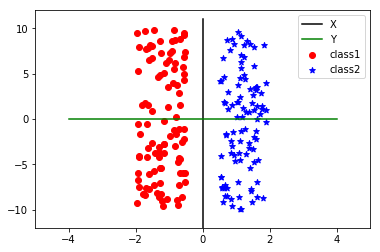

In [23]:
import numpy as np
import matplotlib.pyplot as plt

c1_x = np.random.uniform(-0.5,-2,100)
c1_y = np.random.uniform(-10,10,100)

c2_x = np.random.uniform(0.5,2,100)
c2_y = np.random.uniform(-10,10,100)

l1_x = [0 for _ in range(24)]
l1_y = [i for i in range(-12,12,1)]
l2_x = [i for i in range(-4,5,1)]
l2_y = [0 for _ in range(9)]

plt.scatter(c1_x,c1_y,c = 'r',marker = 'o',label='class1')
plt.scatter(c2_x,c2_y,c = 'b',marker = '*',label='class2')
plt.plot(l1_x,l1_y,'black',label='X')
plt.plot(l2_x,l2_y,'g',label='Y')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-12, 12)
plt.show()

# 从二分类分析LDA原理

先抛出<b>LDA原理中心思想:</b>最大化类间距离和最小化类内距离，再进行说明

从一个简单的二分类问题出发，有C1、C2两个类别的样本，两类的均值分别$\mu_1,\mu_2$,我们希望投影之后两类之间的距离尽可能大$$D(C1,C2) ={ ||W^T\mu_1 - W^T\mu_2||}_2^2$$
注:$W^T\mu_1为\mu_1再W方向上的投影向量$,从而转化为以下优化问题
$$\begin{cases}
  max{ ||W^T\mu_1 - W^T\mu_2||}_2^2\\
  s.t. W^TW = 1
\end{cases}$$

<b>容易发现,当W与$(\mu_1 - \mu_2)$方向一致的时候，该距离最大</b>

<img src="./datasets/lda1.png"  alt="LDA" />

上面左边的图是按照最大化两类投影中心距离的准则绘制的，会发现原本可以被线性划分的两类样本，经过投影后又了一定程度的重叠

上面右边的图就是按照最大类间距，最小类内距思想绘制的，虽然两类的中心在投影之后的距离又所减小，但确使投影之后样本的可区分性提高了

如何表示类内距离？可以使用类内方差，类内方差定义为各个类分别的方差和，有类内距离表示再结合上图说明，继续对上面的优化函数进行优化得到:
$$\begin{cases}
  maxJ(W) = \frac{{ ||W^T\mu_1 - W^T\mu_2||}_2^2}{D1 + D2}\\
  s.t. W^TW = 1
\end{cases}$$
注:D1为C1的类内方差和，D2为C2的类内方差和

# LDA求解方法

$$\begin{cases}
  maxJ(W) = \frac{{ ||W^T\mu_1 - W^T\mu_2||}_2^2}{D1 + D2}\\
  s.t. W^TW = 1
\end{cases}$$

$$D1 = \sum_{x\epsilon C_1}{(W^T(x_i - \mu_1))}^2 = \sum_{x\epsilon C_1}W^T(x_i - \mu_1){(x_i - \mu_1)}^TW $$
$$D2 = \sum_{x\epsilon C_2}{(W^T(x_i - \mu_2))}^2 = \sum_{x\epsilon C_2}W^T(x_i - \mu_2){(x_i - \mu_2)}^TW $$

因此J(W)可以写成:

$$J(W) = \frac{W^T(\mu_1 - \mu_2){(\mu_1 - \mu_2)}^TW}{\sum_{x\epsilon C_i}W^T(x - \mu_i){(x - \mu_i)}^TW}$$
定义类间距离$S_B = (\mu_1 - \mu_2){(\mu_1 - \mu_2)}^T$,类内距离$S_W = \sum_{x\epsilon C_i}(x - \mu_i){(x - \mu_i)}^T$

则:$$J(W) = \frac{W^TS_BW}{W^TS_WW}$$

对W求导，并令导数为0
$$(W^TS_W W)S_B W = (W^T S_B W)S_W W$$

令$\lambda = J(W) = \frac{W^TS_BW}{W^TS_WW}$则有:
$$S_B W = \lambda S_w W$$
整理得到:
$${S_w}^{-1}S_BW = \lambda W$$

看到这里就以及很清楚了,我们最大化目标对应一个矩阵的特征值，于是LDA降维变成了一个求矩阵特征向量的问题。$J(W)$就对应矩阵${S_w}^{-1}S_B$的最大的特征值，而投影方向就是这个特征值对应的特征向量

将二分类推广到多分类也得到同样的结论，总结具有多个列别标签高维的LDA求解方法：
- (1)计算数据集中每个类别样本的均值向量$\mu_j$,以及总体均值向量$\mu$
- (2)计算类内散度矩阵$S_W$,全局散度矩阵$S_T$,并得到类间散度矩阵$S_B = S_T - S_W$
- (3)对矩阵${S_W}^{-1}S_B进行特征值分解，将特征值从大到小排列$
- (4)特征值前d大的对应的特征向量$W_1,W_2,...,W_d$，通过以下映射将n维映射到d维:$$\acute{X_i} ={(W_1^Tx_i,W_2^Tx_i,...,W_d^Tx_i)}^T$$

<b>参考：</b>《百面机器学习》
